In [1]:
from neuron import h, gui
import matplotlib.pyplot as plt

In [2]:
# we'll use a hoc template in order to load the morphology
h.load_file("import3d.hoc")
h.load_file("nrngui.hoc")
h("objref cell, tobj")

model_file = "template_model"
h.load_file("%s.hoc" % model_file)
h.execute("cell = new " + model_file + "()")

nl = h.Import3d_SWC_read()
nl.quiet = 1
nl.input("morph.swc")
imprt = h.Import3d_GUI(nl, 0)
imprt.instantiate(h.cell)
cell = h.cell

#inserting passive mechanism
for sec in cell.all:
    sec.insert("pas")
    sec.g_pas = 1.0 / 20000.0
    sec.Ra = 100
    sec.e_pas = -70

### Now in the GUI check Graph/Shape plot!

In [3]:
# lets check the diameter change as a function of distance!

# geting all dendrite terminals
terminals_basal = set()
terminals_apical = set()

for sec in cell.dend:
    sref = h.SectionRef(sec=sec)
    if sref.nchild() == 0:
         terminals_basal.add(sec)

for sec in cell.apic:
    sref = h.SectionRef(sec=sec)
    if sref.nchild() == 0:
         terminals_apical.add(sec)
            
print("number of apical terminals: %i" % len(terminals_apical))
print("number of basal terminals: %i" % len(terminals_basal))

number of apical terminals: 19
number of basal terminals: 19


In [4]:
def plot_section_diam(section, start_diam, start_distance, c):
    """plot distance vs. diam for all sections"""
    start_distance = h.distance(section(0))
    start_diam = section(0).diam
    for seg in section:
        plt.plot([start_distance, h.distance(section(seg.x))], [start_diam, seg.diam], color=c)

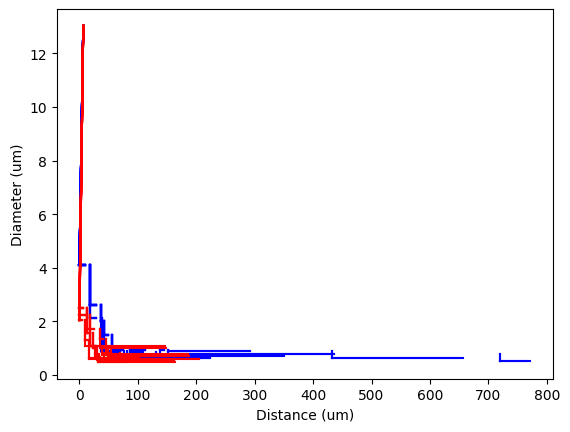

In [5]:
h.distance(0,0.5, cell.soma[0])  # init origin for distance calculation
fig = plt.figure()  # init figure to draw on
plt.xlabel("Distance (um)")
plt.ylabel("Diameter (um)")

for section in terminals_apical:
    cur_sec = section
    while cur_sec != cell.soma[0]:
        plot_section_diam(cur_sec, start_diam=0, start_distance=0 ,c='b')
        end_diam = cur_sec(0).diam
        end_distance = h.distance(cur_sec(0))
        cur_sec = h.SectionRef(sec = cur_sec).parent
        plt.plot([end_distance, h.distance(cur_sec(1))], [end_diam, cur_sec(1).diam], color='b')

for section in terminals_basal:
    cur_sec = section
    while cur_sec != cell.soma[0]:
        plot_section_diam(cur_sec, start_diam=0, start_distance=0 ,c='r')
        end_diam = cur_sec(0).diam
        end_distance = h.distance(cur_sec(0))
        cur_sec = h.SectionRef(sec = cur_sec).parent
        plt.plot([end_distance, h.distance(cur_sec(1))], [end_diam, cur_sec(1).diam], color='r')

In [6]:
# lets add an IClamp to
clamp = h.IClamp(cell.soma[0](0.5))
clamp.amp = 0.5
clamp.dur = 1000
clamp.delay = 200
h.v_init = -70
h.tstop = 1500

### Now in the GUI open Graph/Voltage axis!

In [7]:
# run sim and check graph
h.run();